### Input the parameter 

In [1]:
gor = int(input("Enter your GOR: "))
time_init = int(input("Enter your time initial: "))
time_final = int(input("Enter your time final: "))

Enter your GOR: 721
Enter your time initial: 1
Enter your time final: 9


### Algorithm for IOIP calculation

First, let's import NumPy library

In [2]:
import numpy as np

Make algorithm for the time code

In [3]:
list_time = [1]

time = time_init
while time < time_final:
    time += 1
    list_time.append(time)

In [4]:
list_bt = [1.4980, 1.5320, 1.5620, 1.6210, 1.7010, 1.8170, 1.9670, 2.1110, 2.2510]
list_bg = [1.0480, 1.1550, 1.2800, 1.4410, 1.6340, 1.8840, 2.2060, 2.4330, 2.6540]
list_rp = [0, 725, 738, 809, 1012, 1223, 1424, 1561, 1695]
list_np = [0, 1882, 4976, 7292, 11126, 12858, 15501, 16016, 17394]

This code below was the data that we know first

In [5]:
print(list_time)
print(list_bt)
print(list_bg)
print(list_rp)
print(list_np)

[1, 2, 3, 4, 5, 6, 7, 8, 9]
[1.498, 1.532, 1.562, 1.621, 1.701, 1.817, 1.967, 2.111, 2.251]
[1.048, 1.155, 1.28, 1.441, 1.634, 1.884, 2.206, 2.433, 2.654]
[0, 725, 738, 809, 1012, 1223, 1424, 1561, 1695]
[0, 1882, 4976, 7292, 11126, 12858, 15501, 16016, 17394]


Import pandas library

In [6]:
import pandas as pd

Make a tabular data

In [7]:
array = np.array((list_time, list_bt, list_bg, list_rp, list_np))

data = pd.DataFrame(array.transpose(), columns=["Time Code", "Bt (rb/stb)", "Bg (rb/mcf)", "Rp (scf/stb)", "Np (mstb)"])

In [8]:
print(data)

   Time Code  Bt (rb/stb)  Bg (rb/mcf)  Rp (scf/stb)  Np (mstb)
0        1.0        1.498        1.048           0.0        0.0
1        2.0        1.532        1.155         725.0     1882.0
2        3.0        1.562        1.280         738.0     4976.0
3        4.0        1.621        1.441         809.0     7292.0
4        5.0        1.701        1.634        1012.0    11126.0
5        6.0        1.817        1.884        1223.0    12858.0
6        7.0        1.967        2.206        1424.0    15501.0
7        8.0        2.111        2.433        1561.0    16016.0
8        9.0        2.251        2.654        1695.0    17394.0


And still continue to make algorithm from IOIP calculation

Determine F equation

In [9]:
def F(np, bt, bg, rp, gor):
    return np * (bt + (bg / 1000) * (rp - gor))

Initiate the bti parameter

In [10]:
bti = list_bt[0]
print(bti)

1.498


Determine Eo equation

In [11]:
def eo(bt, bti):
    return bt - bti     

In [12]:
list_f = [0]
list_eo = [0]
i = 1
while i in range (time_init, time_final):
    list_f.append(F(list_np[i], list_bt[i], list_bg[i], list_rp[i], gor))
    list_eo.append(eo(list_bt[i], bti))
    i += 1
    
print(list_f)
print(list_eo)

[0, 2891.9188400000003, 7880.789760000001, 12745.015936, 24215.672243999998, 35523.670944, 54529.696818000004, 66541.99552, 84117.314424]
[0, 0.03400000000000003, 0.06400000000000006, 0.123, 0.20300000000000007, 0.31899999999999995, 0.4690000000000001, 0.6130000000000002, 0.7529999999999999]


Make a tabular data again by added columns

In [13]:
array = np.array((list_time, list_bt, list_bg, list_rp, list_np, list_f, list_eo))

x_and_y = pd.DataFrame(array.transpose(), columns=["Time Code", "Bt (rb/stb)", "Bg (rb/mcf)", "Rp (scf/stb)", "Np (mstb)", "F (mstb)", "Eo (bbl/stb)"])
x_and_y

,Time Code,Bt (rb/stb),Bg (rb/mcf),Rp (scf/stb),Np (mstb),F (mstb),Eo (bbl/stb)
0,1.0,1.498,1.048,0.0,0.0,0.000000,0.000
1,2.0,1.532,1.155,725.0,1882.0,2891.918840,0.034
2,3.0,1.562,1.280,738.0,4976.0,7880.789760,0.064
3,4.0,1.621,1.441,809.0,7292.0,12745.015936,0.123
4,5.0,1.701,1.634,1012.0,11126.0,24215.672244,0.203
5,6.0,1.817,1.884,1223.0,12858.0,35523.670944,0.319
6,7.0,1.967,2.206,1424.0,15501.0,54529.696818,0.469
7,8.0,2.111,2.433,1561.0,16016.0,66541.995520,0.613
8,9.0,2.251,2.654,1695.0,17394.0,84117.314424,0.753


### Graph

For make a scatter plot, we have to import matplotlib library

In [14]:
import matplotlib.pyplot as plt

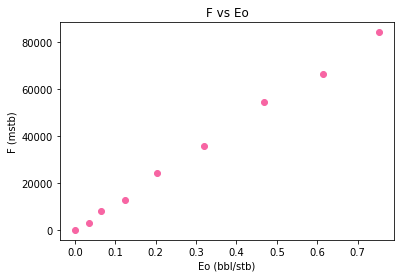

In [15]:
plt.scatter(list_eo, list_f, c="#f765a3")
plt.title('F vs Eo')
plt.xlabel('Eo (bbl/stb)')
plt.ylabel('F (mstb)')

plt.show()

### Trendline

This below code was not mandatory for the upcoming code, but if you want to save the graph you can use this library below

In [16]:
from google.colab import files

To make a trendline from the graph that we have made before, we use numpy polyfit and poly1d. As you can see from this below code there are comments code that we can save the picture of the graph, but remember this is optional

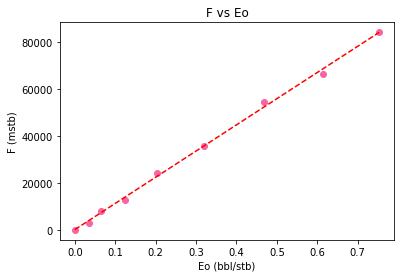

In [17]:
plt.scatter(list_eo, list_f, c="#f765a3")
plt.title('F vs Eo')
plt.xlabel('Eo (bbl/stb)')
plt.ylabel('F (mstb)')

z = np.polyfit(list_eo, list_f, 1)
p = np.poly1d(z)
plt.plot(list_eo,p(list_eo),"r--")

# plt.savefig("F_vs_Eo_in_1000_px.png", dpi=100)
# files.download("F_vs_Eo_in_1000_px.png")
plt.show()

Here you can see the trendline and also download the images of the graph

### Linear Regression

From this section started from make algorithm from linear regression concept, by made new variable for time code, Eo as xi, and F as yi

In [18]:
i = list_time
xi = list_eo
yi = list_f

And then make a new tabular data from the data we have found before

In [19]:
new_array = np.array((i, xi, yi))
new_data = pd.DataFrame(new_array.transpose(), columns=["Time", "Xi", "Yi"])

new_data

,Time,Xi,Yi
0,1.0,0.000,0.000000
1,2.0,0.034,2891.918840
2,3.0,0.064,7880.789760
3,4.0,0.123,12745.015936
4,5.0,0.203,24215.672244
5,6.0,0.319,35523.670944
6,7.0,0.469,54529.696818
7,8.0,0.613,66541.995520
8,9.0,0.753,84117.314424


It still continues to determine x^2 and xi.yi equation

In [20]:
def x_squared(xi):
    return xi ** 2

In [21]:
def sigma_x_multiply_y(xi, yi):
    return xi * yi

In [22]:
xi_squared = [0]
sigma_xi_multiply_yi = [0]
order = 1
while order in range (time_init, time_final):
    xi_squared.append(x_squared(xi[order]))
    sigma_xi_multiply_yi.append(sigma_x_multiply_y(xi[order], yi[order]))
    order += 1
    
print(xi_squared)
print(sigma_xi_multiply_yi)

[0, 0.001156000000000002, 0.004096000000000008, 0.015129, 0.04120900000000003, 0.10176099999999996, 0.21996100000000007, 0.37576900000000024, 0.5670089999999999]
[0, 98.3252405600001, 504.3705446400005, 1567.636960128, 4915.781465532001, 11332.051031135998, 25574.427807642005, 40790.24325376001, 63340.337761271985]


Added x^2 and xi.yi into tabular data that we have made

In [23]:
new_data['Xi^2'] = xi_squared
new_data['Xi.Yi'] = sigma_xi_multiply_yi
new_data

,Time,Xi,Yi,Xi^2,Xi.Yi
0,1.0,0.000,0.000000,0.000000,0.000000
1,2.0,0.034,2891.918840,0.001156,98.325241
2,3.0,0.064,7880.789760,0.004096,504.370545
3,4.0,0.123,12745.015936,0.015129,1567.636960
4,5.0,0.203,24215.672244,0.041209,4915.781466
5,6.0,0.319,35523.670944,0.101761,11332.051031
6,7.0,0.469,54529.696818,0.219961,25574.427808
7,8.0,0.613,66541.995520,0.375769,40790.243254
8,9.0,0.753,84117.314424,0.567009,63340.337761


This below code was many equations to count number of times, xi total, yi total, xi^2 total, xi.yi total, xi average, and yi average. After I've coded the equations then show the results

In [24]:
index = new_data.index
number_of_times = len(index)

xi_total = sum(xi)
yi_total = sum(yi)
xi_squared_total = sum(xi_squared)
sigma_xi_multiply_yi_total = sum(sigma_xi_multiply_yi)

xi_average = xi_total / number_of_times
yi_average = yi_total / number_of_times

print(number_of_times, xi_total, yi_total, xi_squared_total, sigma_xi_multiply_yi_total)
print(xi_average, yi_average)

9 2.5780000000000003 288446.074486 1.3260900000000002 148123.17406467
0.2864444444444445 32049.563831777778


a1 equations and the value

In [25]:
def a1(number_of_times, sigma_xi_multiply_yi_total, xi_total, yi_total, xi_squared_total):
  return (((number_of_times * sigma_xi_multiply_yi_total) - (xi_total * yi_total)) / ((number_of_times * xi_squared_total) - (xi_total ** 2)))

a1_value = a1(number_of_times, sigma_xi_multiply_yi_total, xi_total, yi_total, xi_squared_total)
print(float(a1_value))

111462.4933409524


a0 equations and the value

In [26]:
def a0(yi_average, a1_value, xi_average):
  return yi_average - (a1_value * xi_average)

a0_value = a0(yi_average, a1_value, xi_average)
print(float(a0_value))

121.7518503360734


Yi model equation

In [29]:
print(f"From the results we can conclude that yi_model = {a1_value}x + {a0_value}")

From the results we can conclude that yi_model = 111462.4933409524x + 121.7518503360734


Yi model calculation

In [30]:
def y_model(a0_value, a1_value, xi):
    return a0_value + (a1_value * xi)

In [31]:
yi_model = [0]
j = 1
while j in range(time_init, time_final):
    yi_model.append(y_model(a0_value, a1_value, xi[j]))
    j += 1
    
print(yi_model)

[0, 3911.476623928458, 7255.351424157033, 13831.638531273218, 22748.637998549417, 35678.287226099885, 52397.66122724276, 68448.26026833992, 84053.00933607321]


Added yi model into tabular data

In [32]:
new_data['Yi model'] = yi_model
new_data

,Time,Xi,Yi,Xi^2,Xi.Yi,Yi model
0,1.0,0.000,0.000000,0.000000,0.000000,0.000000
1,2.0,0.034,2891.918840,0.001156,98.325241,3911.476624
2,3.0,0.064,7880.789760,0.004096,504.370545,7255.351424
3,4.0,0.123,12745.015936,0.015129,1567.636960,13831.638531
4,5.0,0.203,24215.672244,0.041209,4915.781466,22748.637999
5,6.0,0.319,35523.670944,0.101761,11332.051031,35678.287226
6,7.0,0.469,54529.696818,0.219961,25574.427808,52397.661227
7,8.0,0.613,66541.995520,0.375769,40790.243254,68448.260268
8,9.0,0.753,84117.314424,0.567009,63340.337761,84053.009336


Find Sr, St, R^2

In [33]:
def sr(yi, yi_model):
  return (yi[0] - yi_model[0])**2 + (yi[1] - yi_model[1])**2 + (yi[2] - yi_model[2])**2 + (yi[3] - yi_model[3])**2 + (yi[4] - yi_model[4])**2 + (yi[5] - yi_model[5])**2 + (yi[6] - yi_model[6])**2 + (yi[7] - yi_model[7])**2 + (yi[8] - yi_model[8])**2

sr_value = sr(yi, yi_model)
print(float(sr_value))

12971071.718636902


In [34]:
def st(yi, yi_average):
  return (yi[0] - yi_average)**2 + (yi[1] - yi_average)**2 + (yi[2] - yi_average)**2 + (yi[3] - yi_average)**2 + (yi[4] - yi_average)**2 + (yi[5] - yi_average)**2 + (yi[6] - yi_average)**2 + (yi[7] - yi_average)**2 + (yi[8] - yi_average)**2

st_value = st(yi, yi_average)
print(float(st_value))

7313712165.081776


In [35]:
def r2(sr_value, st_value):
  return (st_value - sr_value) / st_value 

r2(sr_value, st_value)

0.9982264722174103